In [1]:
%cd ..

d:\My Projects\Toxic Tagger


In [ ]:
import pandas as pd
df = pd.read_feather("artifacts/feature_engineering/test_data.feather")

In [5]:
X = df.drop(columns='Label')
y = df['Label'].values

In [2]:
import joblib
with open("models/XGB-v2.joblib", 'rb') as f:
    model = joblib.load(f)

In [7]:
y_pred = model.predict(X)

In [8]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

In [9]:
acc

0.8199583333333333

In [ ]:
type(model.vectorizer).__name__

'TfidfVectorizer'

In [14]:
model_metadata = model.metadata

In [16]:
model_metadata.flavors

{'python_function': {'artifacts': {'classifier': {'path': 'artifacts\\XGB-v1.joblib',
    'uri': 'models\\XGB-v1.joblib'},
   'vectorizer': {'path': 'artifacts\\TfidfVectorizer.joblib',
    'uri': 'models\\TfidfVectorizer.joblib'}},
  'cloudpickle_version': '3.1.1',
  'code': None,
  'env': {'conda': 'conda.yaml', 'virtualenv': 'python_env.yaml'},
  'loader_module': 'mlflow.pyfunc.model',
  'python_model': 'python_model.pkl',
  'python_version': '3.11.5',
  'streamable': False}}

In [ ]:
text = ["he is very foolish and naughty"]
df = pd.DataFrame({
    "texts" : text
})

In [20]:
response = model.predict(df)

In [39]:
response['class_probalility_scores']

array([[0.34676784, 0.65323216]], dtype=float32)

### LIME TESTING

In [2]:
%cd ..

d:\My Projects\Toxic Tagger


In [ ]:
import joblib
with open("hf_serve_api/model/python_model.pkl", "rb") as f:
    model = joblib.load(f)

In [ ]:
import pandas as pd

tweet = "such a nonsense idiot guy"
df = pd.DataFrame({
    "comments": [tweet]
})
df

In [9]:
result = model.predict(context=None, model_input=df)

In [56]:
import numpy as np
predict_proba = np.array(result["class_probability_scores"])

In [57]:
predict_proba

array([[0.00182056, 0.99817944]], dtype=float32)

In [33]:
model.predict(context=None, model_input=df)["class_probability_scores"]

array([[0.00182056, 0.99817944]], dtype=float32)

In [36]:
import numpy as np
def lime_prediction(df_input):
    # Convert list of strings into the format your model expects
    result = model.predict(context=None, model_input=df_input)
    return np.array(result["class_probability_scores"])

In [45]:
from lime.lime_text import LimeTextExplainer

class_names = ["non-hate", "hate"]
explainer = LimeTextExplainer(class_names=class_names)

In [59]:
import numpy as np
from lime.lime_text import LimeTextExplainer

def lime_prediction(tweet):
    df = pd.DataFrame({
        "comments": tweet
    })
    # Convert list of strings into the format your model expects
    result = model.predict(context=None, model_input=df)
    print(result)
    print(np.array(result["class_probability_scores"]))
    return np.array(result["class_probability_scores"])


class_names = ["hate", "non-hate"]
explainer = LimeTextExplainer(class_names=class_names)

explanations = explainer.explain_instance(
    tweet,
    lime_prediction,
    num_features=10
)

{'class_probability_scores': array([[0.00182056, 0.99817944],
       [0.00344598, 0.996554  ],
       [0.00306714, 0.99693286],
       ...,
       [0.01244748, 0.9875525 ],
       [0.42760205, 0.57239795],
       [0.00182056, 0.99817944]], shape=(5000, 2), dtype=float32), 'class_label': array([1, 1, 1, ..., 1, 1, 1], shape=(5000,))}
[[0.00182056 0.99817944]
 [0.00344598 0.996554  ]
 [0.00306714 0.99693286]
 ...
 [0.01244748 0.9875525 ]
 [0.42760205 0.57239795]
 [0.00182056 0.99817944]]


In [70]:
explanations.as_map()

{1: [(np.int64(13), np.float64(0.06613134889701434)),
  (np.int64(6), np.float64(0.05296108530504983)),
  (np.int64(9), np.float64(0.043568602404138464)),
  (np.int64(11), np.float64(0.033354653996722654)),
  (np.int64(4), np.float64(0.02935147279088205)),
  (np.int64(0), np.float64(-0.015208785072103524)),
  (np.int64(12), np.float64(0.006571592279595673)),
  (np.int64(10), np.float64(0.0025577864164130653)),
  (np.int64(5), np.float64(0.0012609913039638369)),
  (np.int64(2), np.float64(-0.0009063366892856964))]}

In [ ]:
explanations.save_to_file("lime.html")

In [6]:
import pandas as pd

In [8]:
input = ["hi man"]

df = pd.DataFrame(input, columns=["comments"])

In [75]:
result

{'class_probability_scores': array([[0.00182056, 0.99817944]], dtype=float32),
 'class_label': array([1])}

In [94]:
def round_dict_values(dic):
        return {str(k): round(v, 4) for k, v in dic.items()}

class LimeExplainer:
    def __init__(self):
        class_names = ["hate", "non-hate"]
        self.explainer = LimeTextExplainer(class_names=class_names)
        self.response = None

    def get_explaination(self, tweet):
        df = pd.DataFrame({
            "comments": tweet
        })
        self.response = model.predict(context=None, model_input=df)

        return np.array(self.response["class_probability_scores"])
        
    
    def explain(self, tweet):
        explanations = self.explainer.explain_instance(
            tweet,
            self.get_explaination,
            num_features=10
        )
        return round_dict_values(dic=dict(explanations.as_list()))

In [ ]:
explainer = LimeExplainer()
explainer.explain(tweet=tweet1)

In [118]:
explainer.response

{'class_probability_scores': array([[0.36894268, 0.6310573 ],
        [0.39465338, 0.6053466 ],
        [0.36894268, 0.6310573 ],
        ...,
        [0.4864686 , 0.5135314 ],
        [0.36168152, 0.6383185 ],
        [0.39465338, 0.6053466 ]], shape=(5000, 2), dtype=float32),
 'class_label': array([1, 1, 1, ..., 1, 1, 1], shape=(5000,))}

In [ ]:
tweet1= "i hate that movie"
df_test = pd.DataFrame({
    "comments": [tweet1]
})

In [116]:
model.predict(context=None, model_input=df_test)

{'class_probability_scores': array([[0.36894268, 0.6310573 ]], dtype=float32),
 'class_label': array([1])}

### Checking for Data Drift

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from evidently import Dataset, DataDefinition
from evidently import Report
from evidently.presets import DataDriftPreset

In [2]:
df = pd.read_csv("artifacts/final_data.csv")

In [3]:
df["num_characters"] = df["Content"].apply(lambda x: len(x.replace(" ", "")))

In [4]:
df.head()

,Content,Label,num_words,num_characters
0,retweet to the rejects who constantly call my ...,1,24,99
1,i purpose that whatever attack everyone who ca...,1,16,88
2,are you fucking kidding me you deserve to fuck...,1,10,44
3,retweet i am not racist and i am not sexist i ...,1,17,62
4,just imagine if the two million spent on the s...,1,18,88


In [5]:
df['avg_word_len'] = round(df["num_characters"]/df["num_words"], 4)

In [6]:
df.head()

,Content,Label,num_words,num_characters,avg_word_len
0,retweet to the rejects who constantly call my ...,1,24,99,4.1250
1,i purpose that whatever attack everyone who ca...,1,16,88,5.5000
2,are you fucking kidding me you deserve to fuck...,1,10,44,4.4000
3,retweet i am not racist and i am not sexist i ...,1,17,62,3.6471
4,just imagine if the two million spent on the s...,1,18,88,4.8889


In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

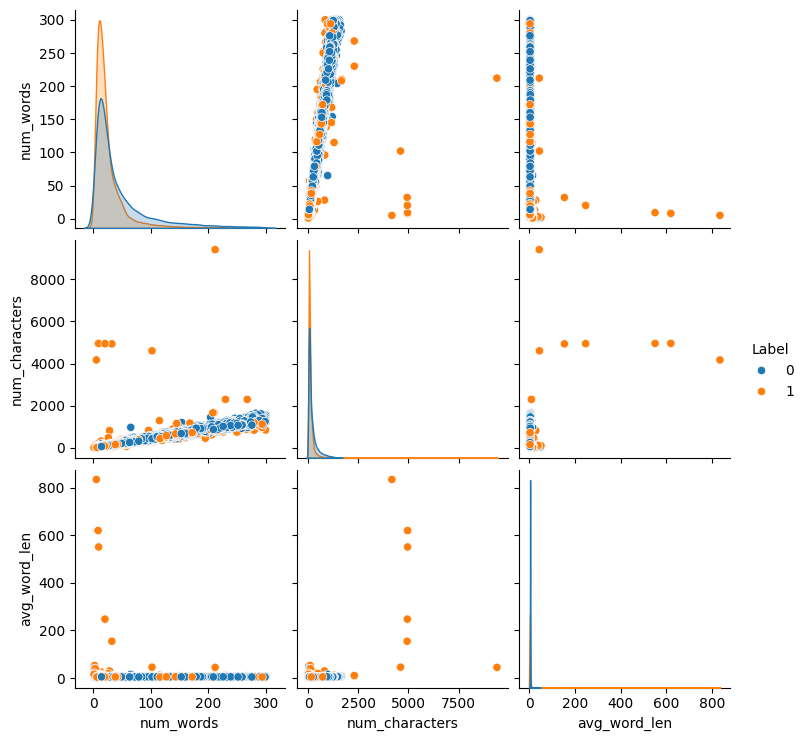

In [8]:
import seaborn as sns
sns.pairplot(df, hue='Label')

In [10]:
train_data.shape

(96000, 5)

In [12]:
df.head(3)

,Content,Label,num_words,num_characters,avg_word_len
0,notability of magnus howie a tag has been plac...,0,237,1098,4.6329
1,big plans,0,2,8,4.0000
2,najbolje je no idea jean no idea drug ako see ...,1,16,65,4.0625


In [13]:
schema = DataDefinition(
    text_columns=["Content"],                          
    numerical_columns=["num_words", "num_characters", "avg_word_len"],
)

In [14]:
train_ds = Dataset.from_pandas(train_data, data_definition=schema)
test_ds  = Dataset.from_pandas(test_data,  data_definition=schema)

In [15]:
# Create the report using the preset
report = Report(metrics=[DataDriftPreset()])

# Run drift detection between train and test
result = report.run(reference_data=train_ds, current_data=test_ds)

In [16]:
result.save_html("artifacts/data_drift.html")

result.save_json("artifacts/data_drift.json")